In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

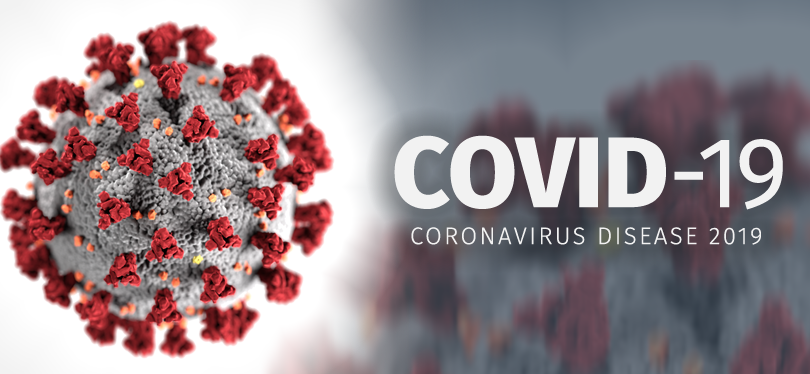

### Overview

**Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face,
and avoiding close contact (1 meter or 3 feet) with people who are unwell.**

### How it spreads

**Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth.**

### symptoms

**People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.**

### Preventions

**You can protect yourself and help prevent spreading the virus to others if you:
Do
• Wash your hands regularly for 20 seconds, with soap and water or alcohol-based hand rub
• Cover your nose and mouth with a disposable tissue or flexed elbow when you cough or sneeze
• Avoid close contact (1 meter or 3 feet) with people who are unwell
• Stay home and self-isolate from others in the household if you feel unwell**

###  Treatments

**There is no specific medicine to prevent or treat coronavirus disease (COVID-19). People may need supportive care to help them breathe.**



### Details of the challenge 

***This is week 2 of Kaggle's COVID19 forecasting series, following the Week 1 competition. This is the 2nd of at least 4 competitions we plan to launch in this series.***

### Background

***The White House Office of Science and Technology Policy (OSTP) pulled together a coalition research groups and companies (including Kaggle) to prepare the COVID-19 Open Research Dataset (CORD-19) to attempt to address key open scientific questions on COVID-19. Those questions are drawn from National Academies of Sciences, Engineering, and Medicine’s (NASEM) and the World Health Organization (WHO).***

### The Challenge

***Kaggle is launching a companion COVID-19 forecasting challenges to help answer a subset of the NASEM/WHO questions. While the challenge involves forecasting confirmed cases and fatalities between April 1 and April 30 by region, the primary goal isn't only to produce accurate forecasts. It’s also to identify factors that appear to impact the transmission rate of COVID-19.***

***You are encouraged to pull in, curate and share data sources that might be helpful. If you find variables that look like they impact the transmission rate, please share your finding in a notebook.***

***As the data becomes available, we will update the leaderboard with live results based on data made available from the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).***

***We have received support and guidance from health and policy organizations in launching these challenges. We're hopeful the Kaggle community can make valuable contributions to developing a better understanding of factors that impact the transmission of COVID-19.***

### Companies and Organizations
***There is also a call to action for companies and other organizations: If you have datasets that might be useful, please upload them to Kaggle’s dataset platform and reference them in this forum thread. That will make them accessible to those participating in this challenge and a resource to the wider scientific community.***

### Acknowledgements
***JHU CSSE for making the data available to the public. The White House OSTP for pulling together the key open questions. The image comes from the Center for Disease Control.***

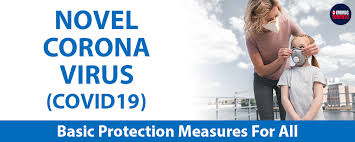

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('../input/covid19-global-forecasting-week-2/train.csv')
test=pd.read_csv('../input/covid19-global-forecasting-week-2/test.csv')

In [ ]:
test1=test

In [ ]:
train.head(5)

In [ ]:
test1.head(5)

In [ ]:
test.head(5)

In [ ]:
train.info()

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'].plot('bar', color='r',width=0.3,title='Date Confirmed Cases', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'][[1,2]])
print(train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'][[4,5,6]])

In [ ]:
#Country_Region top 30
train.Country_Region.value_counts()[0:30].plot(kind='bar')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
train.groupby('Date').mean().sort_values(by='Fatalities', ascending=False)['Fatalities'].plot('bar', color='r',width=0.3,title='Date Fatalities Cases', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(train.groupby('Date').mean().sort_values(by='Fatalities', ascending=False)['Fatalities'][[1,2]])
print(train.groupby('Date').mean().sort_values(by='Fatalities', ascending=False)['Fatalities'][[4,5,6]])

In [ ]:
#visualization of main places US,ITALY,CHINA,UK
#US
ConfirmedCases_date_US = train[train['Country_Region']=='US'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_date_US = train[train['Country_Region']=='US'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_US = ConfirmedCases_date_US.join(fatalities_date_US)


#China
ConfirmedCases_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = ConfirmedCases_date_China.join(fatalities_date_China)

#Italy
ConfirmedCases_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = ConfirmedCases_date_Italy.join(fatalities_date_Italy)

#Australia
ConfirmedCases_date_Australia = train[train['Country_Region']=='Australia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_date_Australia = train[train['Country_Region']=='Australia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = ConfirmedCases_date_Australia.join(fatalities_date_Australia)



plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_US.plot(ax=plt.gca(), title='US')
plt.ylabel("Confirmed  cases", size=13)

plt.subplot(2, 2, 2)
total_date_China.plot(ax=plt.gca(), title='China')

plt.subplot(2, 2, 3)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 4)
total_date_Australia.plot(ax=plt.gca(), title='Australia')

In [ ]:
train['Date']= pd.to_datetime(train['Date']) 
test['Date']= pd.to_datetime(test['Date'])

In [ ]:
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [ ]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [ ]:
create_time_features(train).head()
create_time_features(test).head()

In [ ]:
train.head(5)

In [ ]:
train.drop("date", axis=1, inplace=True)
test.drop("date", axis=1, inplace=True)

In [ ]:
confirmed_corr=train.corr()['ConfirmedCases']

In [ ]:
confirmed_corr.sort_values(ascending=False)

In [ ]:
fatalities_corr=train.corr()['Fatalities']

In [ ]:
fatalities_corr.sort_values(ascending=False)

In [ ]:
train.drop("dayofweek", axis=1, inplace=True)
test.drop("dayofweek", axis=1, inplace=True)

In [ ]:
train.drop("hour", axis=1, inplace=True)
test.drop("hour", axis=1, inplace=True)

In [ ]:
train.drop("quarter", axis=1, inplace=True)
test.drop("quarter", axis=1, inplace=True)

In [ ]:
train.drop("year", axis=1, inplace=True)
test.drop("year", axis=1, inplace=True)

In [ ]:
train.drop("Province_State", axis=1, inplace=True)
test.drop("Province_State", axis=1, inplace=True)

In [ ]:
train.drop("Id", axis=1, inplace=True)
test.drop("ForecastId", axis=1, inplace=True)

In [ ]:
test.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [ ]:
train = FunLabelEncoder(train)
train.info()

In [ ]:
test = FunLabelEncoder(test)
test.info()

In [ ]:
test.head(5)

In [ ]:
x_train= train[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = train[['ConfirmedCases']]
y2 = train[['Fatalities']]
x_test = test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
tree_model= RandomForestClassifier(n_estimators=100, max_depth=200,
                        random_state=1)

In [ ]:
#for confirmed cases
tree_model.fit(x_train,y1)
prediction1 = tree_model.predict(x_test)
prediction1 = pd.DataFrame(prediction1)
prediction1.columns = ["ConfirmedCases_prediction"]

In [ ]:
prediction1.head()

In [ ]:
#for fatalities
tree_model.fit(x_train,y2)
prediction2 = tree_model.predict(x_test)
prediction2 = pd.DataFrame(prediction2)
prediction2.columns = ["Death_prediction"]

In [ ]:
sub_new=test1[["ForecastId"]]
sub_new

In [ ]:

submit = pd.concat([prediction1,prediction2,sub_new],axis=1)
submit.head()

In [ ]:
# Clean
submit.columns = ['ConfirmedCases', 'Fatalities', 'ForecastId']
submit = submit[['ForecastId','ConfirmedCases', 'Fatalities']]

submit["ConfirmedCases"] = submit["ConfirmedCases"].astype(int)
submit["Fatalities"] = submit["Fatalities"].astype(int)

In [ ]:
submit.info()

In [ ]:
submit.head(5)# Final prediction

In [ ]:
submit.shape

In [ ]:
submit.to_csv("submission.csv",index=False)

In [ ]:
submit